# Case Study 2 : Analyzing data from MovieLens

** Due Date: October 27, 2016 5:59PM**

*------------

## The MovieLens data sets

<img src="https://pbs.twimg.com/profile_images/378800000380161537/b6fa868dce43807d4e67462587d0b0d2_400x400.png">

http://grouplens.org/datasets/movielens/



In [1]:
from IPython.lib.display import YouTubeVideo

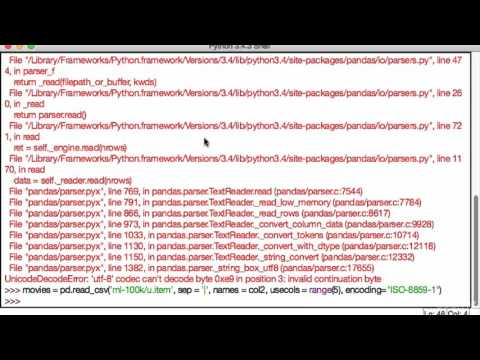

In [2]:
YouTubeVideo('dAjRNi6bhSE')

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

    member 1
    
    member 2
    
    ...

**Desired outcome of the case study.**
* In this case study we will look at the MovieLens 1M Data Set.
    * It contains data about users and how the rate movies.
* The idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* Chapter 2 (only the section on the MovieLens 1M Data Set), Chapter 5, Chapter 6,
and Chapter 8 of the book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)  (available from the WPI library as an e-book).
* If you want your code to be really compact then you might want to also look into the pivot_table method of Panda's DataFrame, though there are many other ways to complete the case study!

**Case study assumptions:**
* You have access to a Python installation

**Required Python libraries:**
* Pandas (pandas.pydata.org)
* Matplotlib (matplotlib.org)
* If you need help installing them then you can refer to the Anaconda documentation of Chapter 1 of Python for Data Analysis book above 

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem 1 (20 points total): 

## (10 points) Importing the MovieLens data set and merging it into a single Pandas DataFrame

* Download the 1 million ratings data set from http://grouplens.org/datasets/movielens/ (though if you are feeling adventerous you can download the 10 million ratings file instead)
* Merge all of the data into a single Pandas DataFrame
* Store the data into an HDF5 file.

## (10 points) Report some basic details of the data you collected.  For example:

*  How many movies have an average rating over 4.5 overall?
*  How many movies have an average rating over 4.5 among men?  How about women?
*  How many movies have an *median* rating over 4.5 among men over age 30?  How about women over age 30?
*  What are the ten most popular movies?
    * Choose what you consider to be a reasonable defintion of "popular".
    * Be perpared to defend this choice.
*  Make some conjectures about how easy various groups are to please? Support your answers with data!  
    *  For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children.  This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
        *  Be sure to come up with your own conjectures and support them with data!


In [2]:
import pandas as pd
import numpy as np

user_names = ['user_id','gender','age','occupation','zip']
users = pd.read_table('C:\\Users\\Su\\Desktop\\ds501\\project_2\\dataset\\ml-1m\\users.dat',sep = '::',header = None, names = user_names,engine = 'python' )
rating_names = ['user_id','movie_id','rating','timestamp']
ratings = pd.read_table('C:\\Users\\Su\\Desktop\\ds501\\project_2\\dataset\\ml-1m\\ratings.dat',sep = '::',header = None, names = rating_names,engine = 'python')
movie_names = ['movie_id','title','genres']
movies = pd.read_table('C:\\Users\\Su\\Desktop\\ds501\\project_2\\dataset\\ml-1m\\movies.dat',sep = '::',header = None, names = movie_names,engine = 'python')

data = pd.merge(pd.merge(ratings, users), movies)
store = pd.HDFStore('data.h5')
store['data'] = data
mean_ratings = data.pivot_table('rating' , index = ['title'], columns = 'gender', aggfunc = 'mean')
movie_good = mean_ratings[mean_ratings > 4.5].dropna(how = 'all') # all movies rating higher than 4.5

movie_good_men = movie_good['M'].dropna(how = 'all')
movie_good_women = movie_good['F'].dropna(how = 'all')

median_ratings = data.pivot_table('rating' , index = ['title'], columns = ['gender','age'], aggfunc = np.median)
columns_result_men = []
for columns in median_ratings:
    if columns[0] == 'M' and columns[1] >=30:
        columns_result_men.append(columns)
movie_median_men = median_ratings[columns_result_men]
movie_median_men = movie_median_men[movie_median_men>4.5].dropna(how = 'all')

columns_result_womean = []
for columns in median_ratings:
    if columns[0] == 'F' and columns[1] >=30:
        columns_result_womean.append(columns)
movie_median_women = median_ratings[columns_result_womean]
movie_median_women = movie_median_women[movie_median_women>4.5].dropna(how = 'all')

vote_count = data.groupby('title').size().rename('vote_counts')
rate_sum = data.groupby('title').rating.sum()
points = (vote_count/(vote_count+1000))*(rate_sum/vote_count)
points = points.sort_values(ascending=False)
print(points[0:9])



title
American Beauty (1999)                                   3.342367
Star Wars: Episode IV - A New Hope (1977)                3.337760
Star Wars: Episode V - The Empire Strikes Back (1980)    3.217043
Raiders of the Lost Ark (1981)                           3.203472
Saving Private Ryan (1998)                               3.150014
Schindler's List (1993)                                  3.145278
Shawshank Redemption, The (1994)                         3.143167
Silence of the Lambs, The (1991)                         3.135551
Sixth Sense, The (1999)                                  3.132408
dtype: float64


In [3]:
movie_good.size    #How many movies have an average rating over 4.5 overall?
movie_good

gender,F,M
title,,
24 7: Twenty Four Seven (1997),5.000000,NaN
Among Giants (1998),4.666667,NaN
Angela (1995),NaN,5.000000
Aparajito (1956),4.666667,NaN
"Apple, The (Sib) (1998)",4.750000,4.600000
Ayn Rand: A Sense of Life (1997),5.000000,NaN
"Baby, The (1973)",NaN,5.000000
"Ballad of Narayama, The (Narayama Bushiko) (1958)",5.000000,NaN
Battling Butler (1926),5.000000,NaN


In [4]:
movie_good_men.size #How many movies have an average rating over 4.5 among men?
movie_good_men

title
Angela (1995)                                                          5.000000
Apple, The (Sib) (1998)                                                4.600000
Baby, The (1973)                                                       5.000000
Bells, The (1926)                                                      5.000000
Dangerous Game (1993)                                                  5.000000
Follow the Bitch (1998)                                                5.000000
For All Mankind (1989)                                                 4.583333
Gate of Heavenly Peace, The (1995)                                     5.000000
Godfather, The (1972)                                                  4.583333
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                                    4.750000
Lamerica (1994)                                                        4.666667
Lured (1947)                                                           5.000000
Raiders of the Lost Ark (1981)    

In [5]:
movie_good_women.size  #How many movies have an average rating over 4.5 among women?
movie_good_women

title
24 7: Twenty Four Seven (1997)                             5.000000
Among Giants (1998)                                        4.666667
Aparajito (1956)                                           4.666667
Apple, The (Sib) (1998)                                    4.750000
Ayn Rand: A Sense of Life (1997)                           5.000000
Ballad of Narayama, The (Narayama Bushiko) (1958)          5.000000
Battling Butler (1926)                                     5.000000
Before the Rain (Pred dozhdot) (1994)                      4.600000
Belly (1998)                                               5.000000
Big Combo, The (1955)                                      5.000000
Bittersweet Motel (2000)                                   5.000000
Brother, Can You Spare a Dime? (1975)                      5.000000
Clean Slate (Coup de Torchon) (1981)                       5.000000
Close Shave, A (1995)                                      4.644444
Coldblooded (1995)                        

In [6]:
movie_median_men.size #How many movies have an median rating over 4.5 among men over age 30?
movie_median_men

gender                                                M               
age                                                  35   45   50   56
title                                                                 
'Night Mother (1986)                                NaN  NaN  NaN  5.0
12 Angry Men (1957)                                 5.0  NaN  NaN  5.0
2001: A Space Odyssey (1968)                        NaN  NaN  5.0  NaN
39 Steps, The (1935)                                NaN  NaN  5.0  NaN
400 Blows, The (Les Quatre cents coups) (1959)      NaN  5.0  NaN  NaN
42 Up (1998)                                        5.0  5.0  NaN  NaN
About Adam (2000)                                   NaN  NaN  NaN  5.0
African Queen, The (1951)                           NaN  5.0  5.0  5.0
Alice in Wonderland (1951)                          NaN  NaN  NaN  5.0
All Quiet on the Western Front (1930)               NaN  5.0  5.0  NaN
All Things Fair (1996)                              NaN  NaN  5.0  NaN
Almost Famous (2000)                                NaN  NaN  5.0  NaN
Amadeus (1984)                                      NaN  5.0  5.0  5.0
American Beauty (1999)                              5.0  NaN  5.0  NaN
American Graffiti (1973)                            NaN  NaN  5.0  5.0
American History X (1998)                           NaN  5.0  NaN  NaN
American in Paris, An (1951)                        NaN  NaN  NaN  5.0
Among Giants (1998)                                 5.0  NaN  NaN  NaN
Amos & Andrew (1993)                                NaN  NaN  NaN  5.0
Anatomy of a Murder (1959)                          NaN  NaN  NaN  5.0
Angel Baby (1995)                                   NaN  NaN  5.0  NaN
Angel on My Shoulder (1946)                         5.0  NaN  NaN  NaN
Angela (1995)                                       NaN  5.0  NaN  NaN
Animal House (1978)                                 5.0  NaN  NaN  NaN
Anne Frank Remembered (1995)                        NaN  NaN  5.0  5.0
Aparajito (1956)                                    NaN  NaN  NaN  5.0
Apocalypse Now (1979)                               5.0  NaN  NaN  NaN
Autumn Tale, An (Conte d'automne) (1998)            NaN  NaN  5.0  NaN
Ayn Rand: A Sense of Life (1997)                    5.0  NaN  NaN  NaN
Ballad of Narayama, The (Narayama Bushiko) (1958)   NaN  5.0  5.0  NaN
...                                                 ...  ...  ...  ...
Treasure of the Sierra Madre, The (1948)            NaN  5.0  5.0  5.0
Trial, The (Le Proc鑣) (1963)                        NaN  NaN  5.0  NaN
Trouble in Paradise (1932)                          NaN  5.0  NaN  5.0
Two Family House (2000)                             NaN  NaN  5.0  NaN
Two or Three Things I Know About Her (1966)         5.0  NaN  NaN  NaN
Umbrellas of Cherbourg, The (Parapluies de Cher...  NaN  NaN  NaN  5.0
Under Suspicion (2000)                              NaN  NaN  NaN  5.0
Unhook the Stars (1996)                             NaN  NaN  5.0  NaN
Usual Suspects, The (1995)                          5.0  NaN  5.0  5.0
Vampyros Lesbos (Las Vampiras) (1970)               5.0  NaN  NaN  NaN
Vie est belle, La (Life is Rosey) (1987)            NaN  NaN  5.0  NaN
Visitors, The (Les Visiteurs) (1993)                NaN  NaN  5.0  NaN
Wallace & Gromit: The Best of Aardman Animation...  5.0  5.0  5.0  NaN
Wanted: Dead or Alive (1987)                        NaN  NaN  NaN  5.0
Welcome to Woop-Woop (1997)                         NaN  5.0  NaN  NaN
West Beirut (West Beyrouth) (1998)                  NaN  NaN  5.0  NaN
What Planet Are You From? (2000)                    NaN  NaN  NaN  5.0
Wide Awake (1998)                                   NaN  NaN  5.0  5.0
Window to Paris (1994)                              5.0  NaN  NaN  NaN
Wizard of Oz, The (1939)                            5.0  5.0  5.0  5.0
Woman in the Dunes (Suna no onna) (1964)            NaN  NaN  5.0  NaN
Women, The (1939)                                   5.0  NaN  NaN  NaN
Wonderful, Horrible Life

In [7]:
movie_median_women.size #How many movies have an median rating over 4.5 among women over age 30?
movie_median_women

gender                                                F               
age                                                  35   45   50   56
title                                                                 
...And Justice for All (1979)                       NaN  NaN  NaN  5.0
2010 (1984)                                         NaN  NaN  NaN  5.0
24 7: Twenty Four Seven (1997)                      5.0  NaN  NaN  NaN
400 Blows, The (Les Quatre cents coups) (1959)      NaN  NaN  5.0  5.0
42 Up (1998)                                        NaN  5.0  NaN  NaN
52 Pick-Up (1986)                                   NaN  5.0  NaN  NaN
Across the Sea of Time (1995)                       NaN  NaN  5.0  NaN
Adventures in Babysitting (1987)                    NaN  NaN  5.0  NaN
Adventures of Buckaroo Bonzai Across the 8th Di...  NaN  NaN  NaN  5.0
Adventures of Robin Hood, The (1938)                NaN  5.0  NaN  NaN
African Queen, The (1951)                           NaN  5.0  5.0  5.0
After Life (1998)                                   5.0  5.0  5.0  5.0
Against All Odds (1984)                             NaN  5.0  NaN  NaN
Age of Innocence, The (1993)                        NaN  NaN  NaN  5.0
Alaska (1996)                                       NaN  5.0  NaN  NaN
Algiers (1938)                                      NaN  5.0  NaN  NaN
All About Eve (1950)                                NaN  NaN  5.0  NaN
All About My Mother (Todo Sobre Mi Madre) (1999)    NaN  5.0  5.0  NaN
All That Jazz (1979)                                NaN  NaN  5.0  NaN
All the Vermeers in New York (1990)                 NaN  NaN  NaN  5.0
Alphaville (1965)                                   NaN  NaN  5.0  NaN
Amadeus (1984)                                      NaN  5.0  5.0  5.0
Amazing Panda Adventure, The (1995)                 NaN  NaN  5.0  NaN
American Beauty (1999)                              NaN  5.0  NaN  NaN
American Flyers (1985)                              NaN  NaN  5.0  NaN
American History X (1998)                           NaN  5.0  NaN  5.0
American Movie (1999)                               NaN  5.0  NaN  NaN
American Tail, An (1986)                            NaN  NaN  NaN  5.0
Among Giants (1998)                                 NaN  NaN  5.0  NaN
Anatomy of a Murder (1959)                          NaN  NaN  NaN  5.0
...                                                 ...  ...  ...  ...
Waiting for Guffman (1996)                          NaN  NaN  NaN  5.0
Wallace & Gromit: The Best of Aardman Animation...  5.0  NaN  NaN  5.0
War Zone, The (1999)                                NaN  NaN  5.0  NaN
Way of the Gun, The (2000)                          NaN  NaN  NaN  5.0
Weird Science (1985)                                NaN  NaN  NaN  5.0
Welcome To Sarajevo (1997)                          5.0  NaN  NaN  NaN
West Beirut (West Beyrouth) (1998)                  5.0  NaN  NaN  NaN
West Side Story (1961)                              NaN  NaN  NaN  5.0
What Happened Was... (1994)                         5.0  NaN  NaN  NaN
When Harry Met Sally... (1989)                      NaN  NaN  NaN  5.0
When We Were Kings (1996)                           NaN  5.0  NaN  5.0
White Squall (1996)                                 NaN  5.0  NaN  NaN
Who's Afraid of Virginia Woolf? (1966)              5.0  NaN  NaN  NaN
Window to Paris (1994)                              5.0  NaN  NaN  NaN
Wings (1927)                                        5.0  NaN  NaN  NaN
Winnie the Pooh and the Blustery Day (1968)         NaN  NaN  5.0  NaN
Winslow Boy, The (1998)                             NaN  NaN  5.0  NaN
Winter Guest, The (1997)                            NaN  5.0  NaN  NaN
Wizard of Oz, The (1939)                            5.0  5.0  5.0  5.0
Wolf (1994)                                         NaN  NaN  5.0  5.0
Woman of Paris, A (1923)                            NaN  5.0  NaN  NaN
Women on the Verge of a Nervous Breakdown (1988)    NaN  NaN  5.0  NaN
Women, The (1939)       

In [27]:
#conjectures


#Action,children,adventure less ratings/drama,comedy,crimethriller max ratings
data.groupby('genres').rating.mean().sort_values()


occupation
19    3.414050
8     3.466741
20    3.497392
18    3.530117
10    3.532675
4     3.536793
5     3.537529
0     3.537544
2     3.573081
1     3.576642
16    3.596575
7     3.599772
17    3.613574
11    3.617371
14    3.618481
12    3.654001
3     3.656516
9     3.656589
6     3.661578
15    3.689774
13    3.781736
Name: rating, dtype: float64

In [28]:
#Men are harder to please
data.groupby('gender').rating.mean().sort_values()

gender
M    3.568879
F    3.620366
Name: rating, dtype: float64

In [29]:
#age < 40 harder to please
data.groupby('age').rating.mean().sort_values()

age
18    3.507573
25    3.545235
1     3.549520
35    3.618162
45    3.638062
50    3.714512
56    3.766632
Name: rating, dtype: float64

In [30]:
# people havings pccupation farmer,unemployed ,writer difficult to please
data.groupby('occupation').rating.mean().sort_values()

occupation
19    3.414050
8     3.466741
20    3.497392
18    3.530117
10    3.532675
4     3.536793
5     3.537529
0     3.537544
2     3.573081
1     3.576642
16    3.596575
7     3.599772
17    3.613574
11    3.617371
14    3.618481
12    3.654001
3     3.656516
9     3.656589
6     3.661578
15    3.689774
13    3.781736
Name: rating, dtype: float64

# Problem 2 (20 points total): Expand our investigation to histograms

**An obvious issue with any inferences drawn from Problem 1 is that we did not consider how many times a movie was rated.** 
* (2 points) Plot a histogram of the ratings of all movies.
* (2 points) Plot a histogram of the *number* of ratings each movie recieved.
* (2 points) Plot a histogram of the *average rating* for each movie.
* (6 points) Plot a histogram of the *average rating* for movies which are rated more than 100 times.
    * What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
    * Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times?
* (8 points) Make some conjectures about the distribution of ratings? Support your answers with data!  
    *  For example, what age range do you think has more extreme ratings?  Do you think children are more or less likely to rate a movie 1 or 5? 
    *  Be sure to come up with your own conjectures and support them with data!

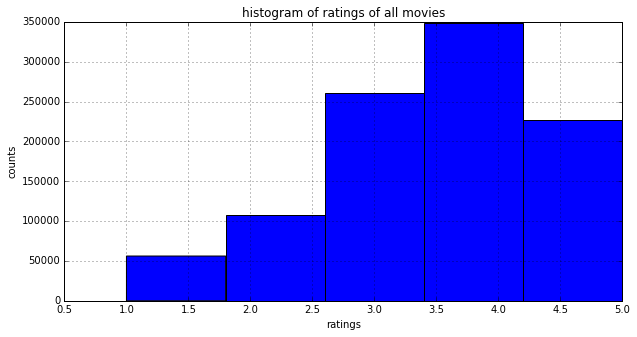

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
rate = data['rating']
plot_rate = rate.hist(bins = 5, figsize= (10,5))
plot_rate.set_xlabel('ratings')
plot_rate.set_ylabel('counts')
plot_rate.set_title('histogram of ratings of all movies')


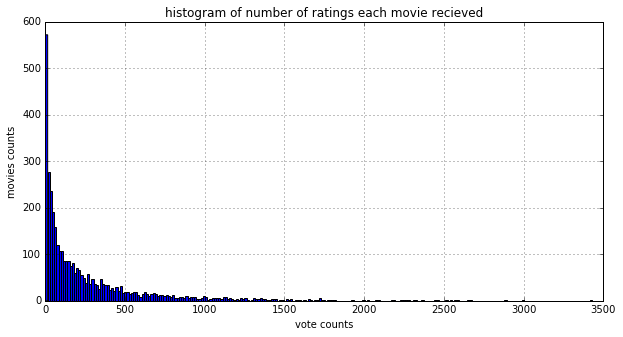

In [12]:
plot_vote = vote_count.hist(bins = 250,figsize = (10,5))
plot_vote.set_xlabel('vote counts')
plot_vote.set_ylabel('movies counts')
plot_vote.set_title('histogram of number of ratings each movie recieved')


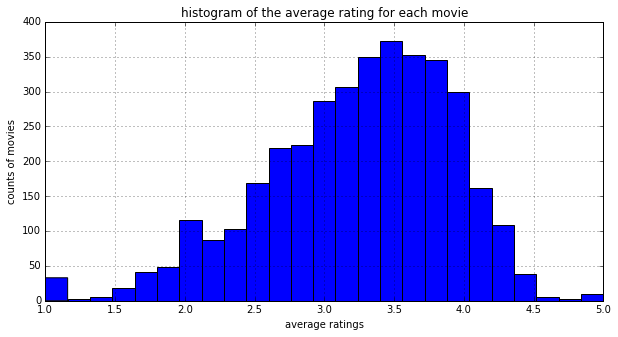

In [13]:
aver_rating = (rate_sum/vote_count)
plot_aver = aver_rating.hist(bins = 25, figsize=(10,5))
plot_aver.set_xlabel('average ratings')
plot_aver.set_ylabel('counts of movies')
plot_aver.set_title('histogram of the average rating for each movie')

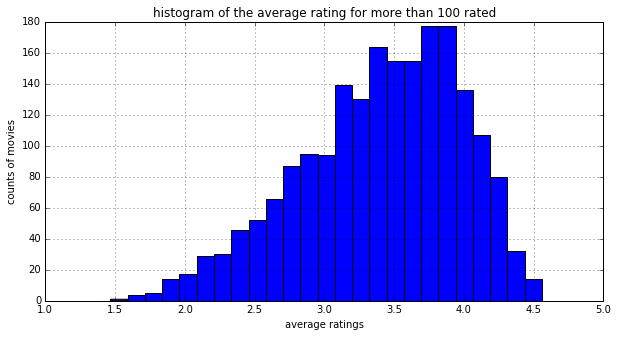

In [14]:
vote_count_hund = vote_count > 100
aver_vote_hund = aver_rating[vote_count_hund]
aver_vote_hund = aver_vote_hund.sort_values(ascending = False)
plot_hund = aver_vote_hund.hist(bins = 25,figsize=(10,5))
plot_hund.set_xlabel('average ratings')
plot_hund.set_ylabel('counts of movies')
plot_hund.set_title('histogram of the average rating for more than 100 rated')

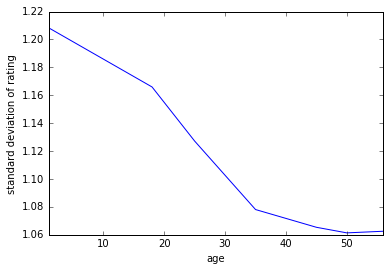

In [15]:
std_age = data.groupby('age').rating.std().plot()
std_age.set_ylabel('standard deviation of rating')

In [21]:
child = data[data['age'] < 20].groupby(['genres']).rating.size()
chidl_std =  data[data['age'] <20].groupby(['genres']).rating.std()
vote_count_genre = child[child >100]
child_result = chidl_std[vote_count_genre.index].sort_values(ascending = False)
child_result

genres
Comedy|Crime|Horror                              1.406540
Comedy|Musical|Romance                           1.366728
Comedy|Musical                                   1.359749
Sci-Fi                                           1.352485
Comedy|Horror|Musical|Sci-Fi                     1.333654
Horror                                           1.305335
Action|Adventure|Sci-Fi|War                      1.294336
Adventure|Sci-Fi                                 1.293726
Comedy|War                                       1.292419
Horror|Thriller                                  1.284168
Action|Comedy|Musical                            1.270138
Action|Sci-Fi                                    1.248711
Children's|Comedy                                1.248514
Children's                                       1.248297
Horror|Mystery|Thriller                          1.245840
Action|Comedy|Fantasy                            1.239982
Action|Adventure|Crime                           1.235801
Comedy|

In [22]:
adult = data[data['age'] >= 20].groupby(['genres']).rating.size()
adult_std =  data[data['age'] >= 20].groupby(['genres']).rating.std()
vote_count_genre_ad = adult[adult >100]
adult_result = adult_std[vote_count_genre_ad.index].sort_values(ascending = False)
adult_result

genres
Action|Animation|Children's|Sci-Fi|Thriller|War    1.380947
Adventure|Animation|Children's                     1.323349
Action|Horror                                      1.276634
Horror                                             1.266797
Action|Comedy|Musical|Sci-Fi                       1.260617
Comedy|Horror|Musical|Sci-Fi                       1.240918
Adventure|Children's|Sci-Fi                        1.240339
Horror|Thriller                                    1.236438
Action|Adventure|Drama                             1.224372
Sci-Fi                                             1.216994
Comedy|Drama|Sci-Fi                                1.210901
Children's|Sci-Fi                                  1.210570
Action|Comedy|Fantasy                              1.210452
Horror|Mystery|Thriller                            1.207234
Comedy|Horror|Thriller                             1.199670
Comedy|Musical|Romance                             1.189475
Fantasy|Sci-Fi                   

*------------------------

# Problem 3: (20 points total)
## Correlation:  Men versus women

Let look more closely at the relationship between the pieces of data we have.

* (2 points) Make a scatter plot of men versus women and their mean rating for every movie.
* (2 points) Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
* (6 points) Compute the *correlation coefficent* between the ratings of men and women.
    * What do you observe?
    * Are the ratings similiar or not? Support your answer with data!
* (10 points) Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!

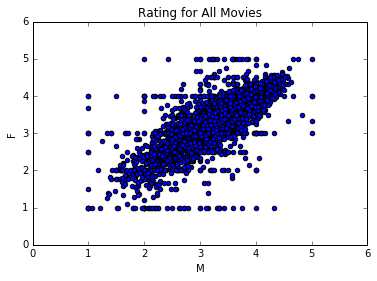

In [23]:
#Make a scatter plot of men versus women and their mean rating for every movie

gendergroup = data.pivot_table('rating', index='title',columns='gender', aggfunc='mean').dropna()
gendergroup.plot('M','F','scatter',title='Rating for All Movies')

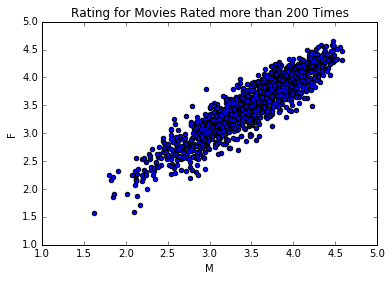

In [24]:
#Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
datacount = data.groupby('title').size()
popularmovies = datacount.index[datacount > 200]
gendergroup_pop = gendergroup.ix[popularmovies]
gendergroup_pop.plot('M','F','scatter',title='Rating for Movies Rated more than 200 Times')

In [25]:
#Compute the correlation coefficent between the ratings of men and women.
print('Correlation:')
print(gendergroup.corr())
print('Correlation with movie over 200 ratings:')
print(gendergroup_pop.corr())

print('Ratings of Men and Women have direct increasing linear relationship.')
print('The dataset for movies over 200 ratings has stronger correlation between Men and Women than the dataset for all movies.')

Correlation:
gender        F        M
gender                  
F       1.00000  0.76319
M       0.76319  1.00000
Correlation with movie over 200 ratings:
gender         F         M
gender                    
F       1.000000  0.918361
M       0.918361  1.000000
Ratings of Men and Women have direct increasing linear relationship.
The dataset for movies over 200 ratings has stronger correlation between Men and Women than the dataset for all movies.


Correlation with movie for age group 0-19:
gender         F         M
gender                    
F       1.000000  0.557607
M       0.557607  1.000000
Correlation with movie for age group 20-39:
gender         F         M
gender                    
F       1.000000  0.709436
M       0.709436  1.000000
Correlation with movie for age group 40-59:
gender         F         M
gender                    
F       1.000000  0.653838
M       0.653838  1.000000


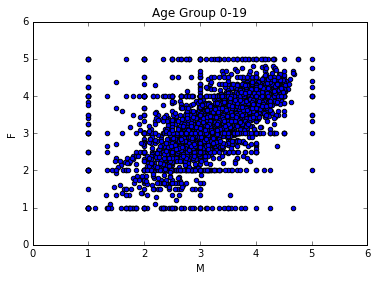

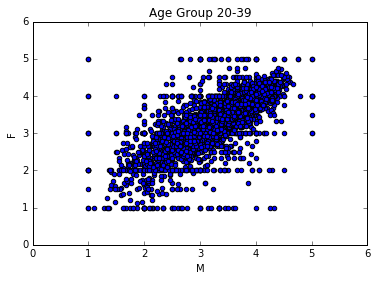

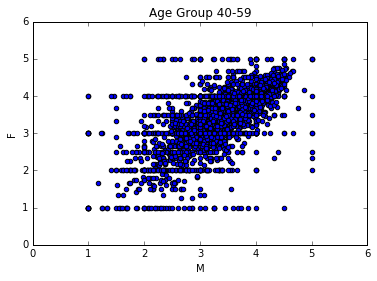

In [26]:
#Are men and women more similar when they are younger or older?
agegroup1 = data.query('age>0 & age<=19')
agegroup2 = data.query('age>20 & age<=39')
agegroup3 = data.query('age>40')
agegroup1_p = agegroup1.pivot_table('rating', index='title',columns='gender', aggfunc='mean').dropna()
agegroup2_p = agegroup2.pivot_table('rating', index='title',columns='gender', aggfunc='mean').dropna()
agegroup3_p = agegroup3.pivot_table('rating', index='title',columns='gender', aggfunc='mean').dropna()
print('Correlation with movie for age group 0-19:')
print(agegroup1_p.corr())
print('Correlation with movie for age group 20-39:')
print(agegroup2_p.corr())
print('Correlation with movie for age group 40-59:')
print(agegroup3_p.corr())
agegroup1_p.plot('M','F','scatter',title='Age Group 0-19')
agegroup2_p.plot('M','F','scatter',title='Age Group 20-39')
agegroup3_p.plot('M','F','scatter',title='Age Group 40-59')

*------------------------

# Problem 4: (20 points total)
## Open Ended Question:  Business Intelligence

* Do any of your conjectures in Problems 1, 2, and 3 provide insights that a movie company might be interested in?
* Propose a business question that you think this data can answer.
* Suppose you are a Data Sciencetist at a movie company.  **Convince your boss that your conjecture is correct!**

In [4]:
import numpy as np
import pandas as pd


names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=names)
df.head()

# print(names)
# print(df)
#print(df.head)

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
n_users = df.user_id.unique().shape[0]
n_items = df.item_id.unique().shape[0]
print((str(n_users) + ' users'))
print((str(n_items) + ' items'))

ratings = np.zeros((n_users, n_items))
for row in df.itertuples():
    ratings[row[1]-1, row[2]-1] = row[3]
print(ratings)

sparsity = float(len(ratings.nonzero()[0]))
sparsity /= (ratings.shape[0] * ratings.shape[1])
sparsity *= 100
print(('Sparsity: {:4.2f}%'.format(sparsity)))



943 users
1682 items
[[ 5.  3.  4. ...,  0.  0.  0.]
 [ 4.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 5.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  5.  0. ...,  0.  0.  0.]]
Sparsity: 6.30%


In [6]:
def train_test_split(ratings):
    test = np.zeros(ratings.shape)
    train = ratings.copy()
    for user in range(ratings.shape[0]):
        test_ratings = np.random.choice(ratings[user, :].nonzero()[0],
                                        size=10,
                                        replace=False)
        train[user, test_ratings] = 0.
        test[user, test_ratings] = ratings[user, test_ratings]

    # Test and training are truly disjoint
    assert(np.all((train * test) == 0))
    return train, test

train, test = train_test_split(ratings)

In [7]:
def slow_similarity(ratings, kind='user'):
    if kind == 'user':
        axmax = 0
        axmin = 1
    elif kind == 'item':
        axmax = 1
        axmin = 0
    sim = np.zeros((ratings.shape[axmax], ratings.shape[axmax]))
    for u in range(ratings.shape[axmax]):
        for uprime in range(ratings.shape[axmax]):
            rui_sqrd = 0.
            ruprimei_sqrd = 0.
            for i in range(ratings.shape[axmin]):
                sim[u, uprime] = ratings[u, i] * ratings[uprime, i]
                rui_sqrd += ratings[u, i] ** 2
                ruprimei_sqrd += ratings[uprime, i] ** 2
            sim[u, uprime] /= rui_sqrd * ruprimei_sqrd
    return sim

In [8]:
def fast_similarity(ratings, kind='user', epsilon=1e-9):
    # epsilon -> small number for handling dived-by-zero errors
    if kind == 'user':
        sim = ratings.dot(ratings.T) + epsilon
    elif kind == 'item':
        sim = ratings.T.dot(ratings) + epsilon
    norms = np.array([np.sqrt(np.diagonal(sim))])
    return (sim / norms / norms.T)

In [9]:
user_similarity = fast_similarity(train, kind='user')
item_similarity = fast_similarity(train, kind='item')
print((item_similarity[:4, :4]))

[[ 1.          0.40316898  0.33757737  0.45561301]
 [ 0.40316898  1.          0.28016763  0.51211381]
 [ 0.33757737  0.28016763  1.          0.32870115]
 [ 0.45561301  0.51211381  0.32870115  1.        ]]


In [10]:
def predict_slow_simple(ratings, similarity, kind='user'):
    pred = np.zeros(ratings.shape)
    if kind == 'user':
        for i in range(ratings.shape[0]):
            for j in range(ratings.shape[1]):
                pred[i, j] = similarity[i, :].dot(ratings[:, j])\
                             /np.sum(np.abs(similarity[i, :]))
        return pred
    elif kind == 'item':
        for i in range(ratings.shape[0]):
            for j in range(ratings.shape[1]):
                pred[i, j] = similarity[j, :].dot(ratings[i, :].T)\
                             /np.sum(np.abs(similarity[j, :]))

        return pred

In [11]:
def predict_fast_simple(ratings, similarity, kind='user'):
    if kind == 'user':
        return similarity.dot(ratings) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif kind == 'item':
        return ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])

In [12]:
import requests
import json

# Get base url filepath structure. w185 corresponds to size of movie poster.
headers = {'Accept': 'application/json'}
payload = {'api_key': 'c80ab4f107a9fdacccf328b338a8c307'}
response = requests.get("http://api.themoviedb.org/3/configuration", params=payload, headers=headers)
response = json.loads(response.text)
base_url = response['images']['base_url'] + 'w185'

def get_poster(imdb_url, base_url):
    # Get IMDB movie ID
    response = requests.get(imdb_url)
    movie_id = response.url.split('/')[-2]

    # Query themoviedb.org API for movie poster path.
    movie_url = 'http://api.themoviedb.org/3/movie/{:}/images'.format(movie_id)
    headers = {'Accept': 'application/json'}
    payload = {'api_key': 'c80ab4f107a9fdacccf328b338a8c307'}
    response = requests.get(movie_url, params=payload, headers=headers)
    try:
        file_path = json.loads(response.text)['posters'][0]['file_path']
    except:
        # IMDB movie ID is sometimes no good. Need to get correct one.
        movie_title = imdb_url.split('?')[-1].split('(')[0]
        payload['query'] = movie_title
        response = requests.get('http://api.themoviedb.org/3/search/movie', params=payload, headers=headers)
        movie_id = json.loads(response.text)['results'][0]['id']
        payload.pop('query', None)
        movie_url = 'http://api.themoviedb.org/3/movie/{:}/images'.format(movie_id)
        response = requests.get(movie_url, params=payload, headers=headers)
        file_path = json.loads(response.text)['posters'][0]['file_path']

    return base_url + file_path

from IPython.display import Image
from IPython.display import display

toy_story = 'http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)'
Image(url=get_poster(toy_story, base_url))

In [13]:
# Load in movie data
idx_to_movie = {}
with open('u.item', 'r') as f:
    for line in f.readlines():
        info = line.split('|')
        idx_to_movie[int(info[0])-1] = info[4]

def top_k_movies(similarity, mapper, movie_idx, k=6):
    return [mapper[x] for x in np.argsort(similarity[movie_idx,:])[:-k-1:-1]]

In [14]:
idx = 221 # Star Trek: First Contact (1996) . Genre: Action|Adventure|Sci-Fi
movies = top_k_movies(item_similarity, idx_to_movie, idx)
posters = tuple(Image(url=get_poster(movie, base_url)) for movie in movies)
display(*posters)

In [15]:
from sklearn.metrics import pairwise_distances
# Convert from distance to similarity
item_correlation = 1 - pairwise_distances(train.T, metric='correlation')
item_correlation[np.isnan(item_correlation)] = 0.

idx = 221 # Star Trek: First Contact (1996) . Genre: Action|Adventure|Sci-Fi
movies = top_k_movies(item_correlation, idx_to_movie, idx)
posters = tuple(Image(url=get_poster(movie, base_url)) for movie in movies)
display(*posters)

In [16]:
idx = 403 # Pinocchio (1940)  Genre: Animation|Family|Fantasy
movies = top_k_movies(item_correlation, idx_to_movie, idx)
posters = tuple(Image(url=get_poster(movie, base_url)) for movie in movies)
display(*posters)

In [17]:
idx = 11 # The Usual Suspects (1995) Genre: Crime, Drama, Mystery 
movies = top_k_movies(item_correlation, idx_to_movie, idx)
posters = tuple(Image(url=get_poster(movie, base_url)) for movie in movies)
display(*posters)

# Report: communicate the results (20 points)

(1) (5 points) What data you collected?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) What did you find in the data?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

     (please include figures or tables in the report, **but no source code**)

*Please compress all the files into a single zipped file.*


** How to submit: **

        Send an email to rcpaffenroth@wpi.edu and wliu3@wpi.edu with the subject: "[DS501] Case study 2-TEAM NUMBER ???".